<a href="https://colab.research.google.com/github/var-21/AI-ML-FMML/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is

*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [174]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [176]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

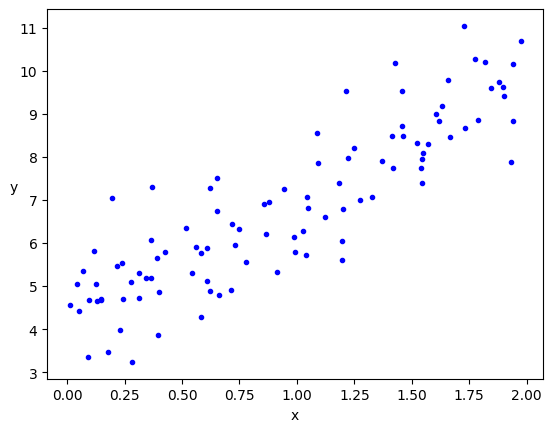

In [177]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [178]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [179]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [180]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

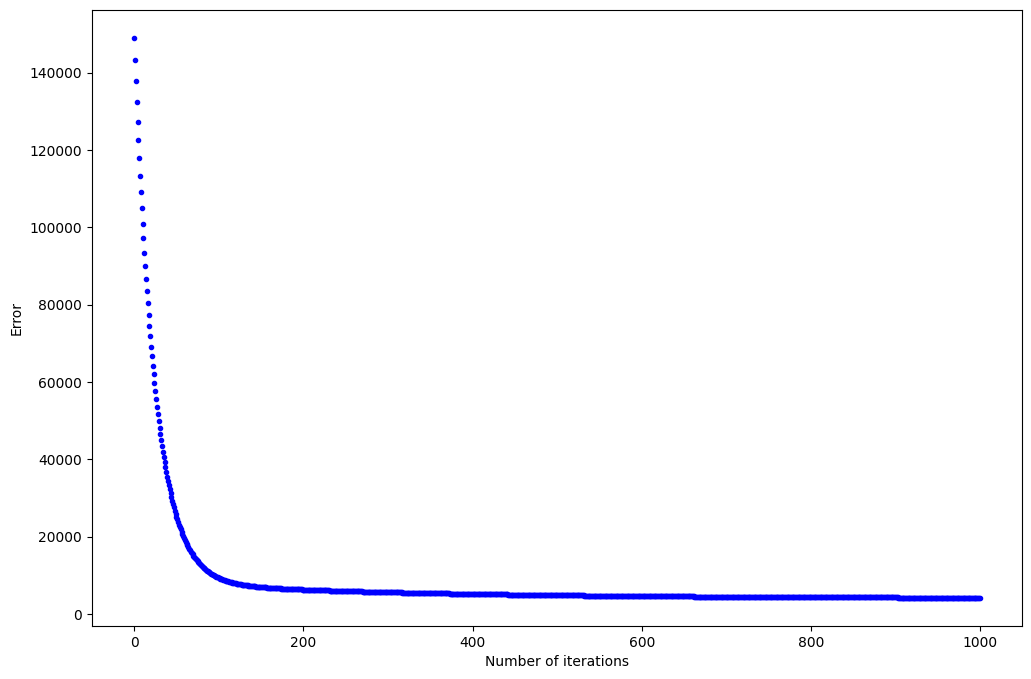

In [181]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

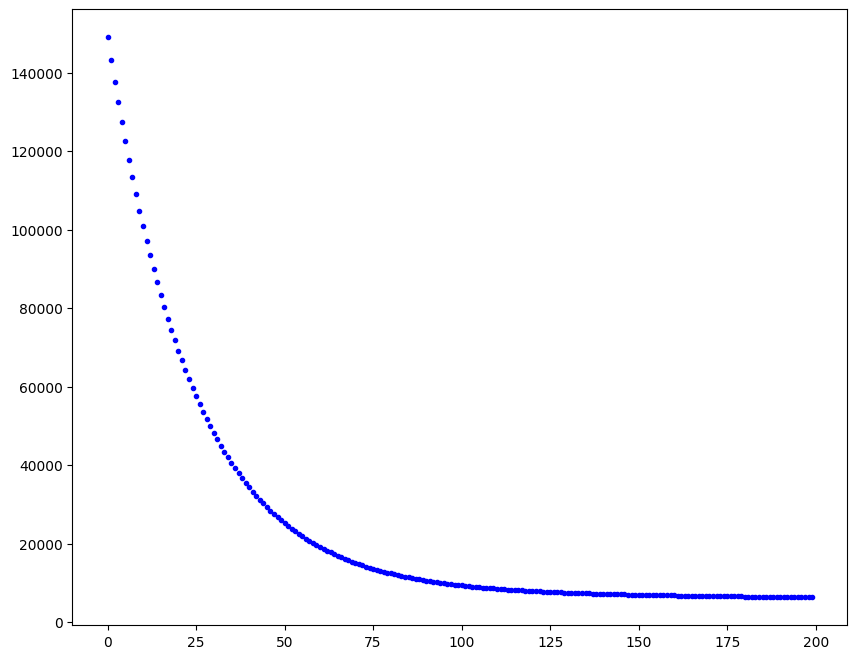

In [182]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [183]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [184]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


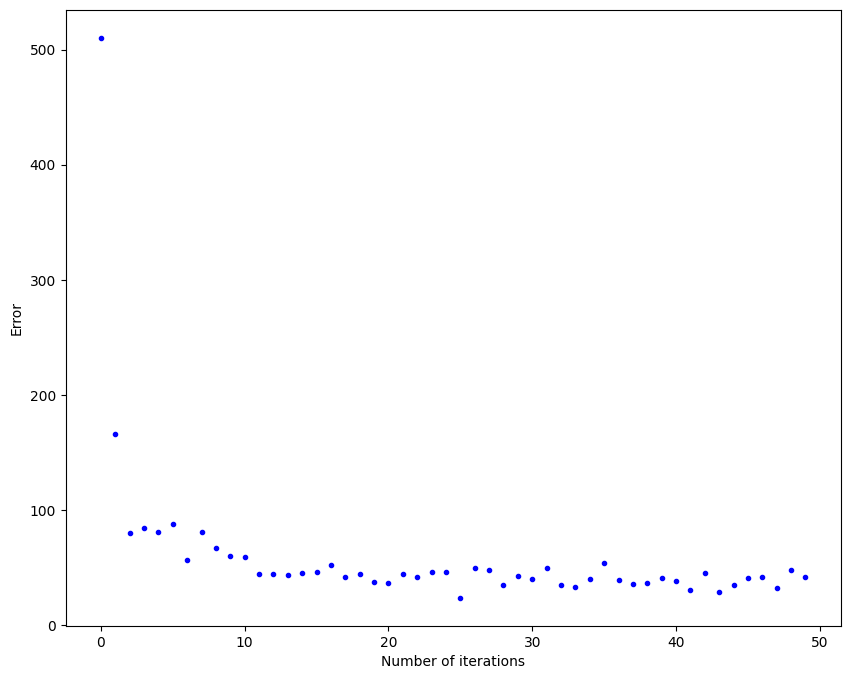

In [185]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [186]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [187]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


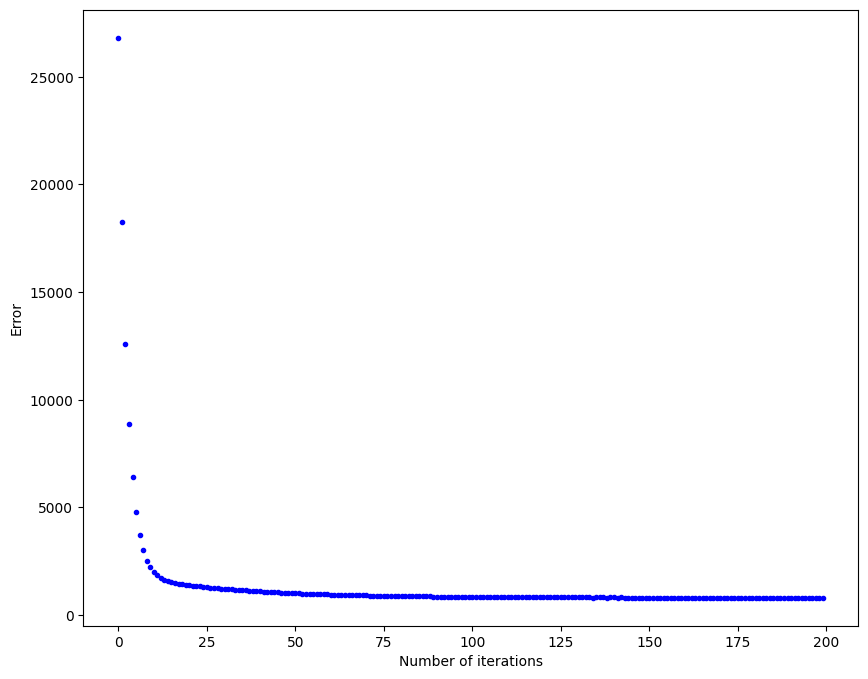

In [188]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1.Change batch size in mini-batch gradient descent.

In [189]:
def minibatch_gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=36):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [190]:
lr = 0.1
n_iter = 200
y_pred_1= np.random.randn(2,1)
y_pred_1, cost_history_1 = minibatch_gradient_descent_1(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_1[0][0], y_pred_1[1][0]))
print('Final error: {:0.3f}'.format(cost_history_1[-1]))

y_pred[0]: 4.194
y_pred[1]: 2.788
Final error: 1337.816


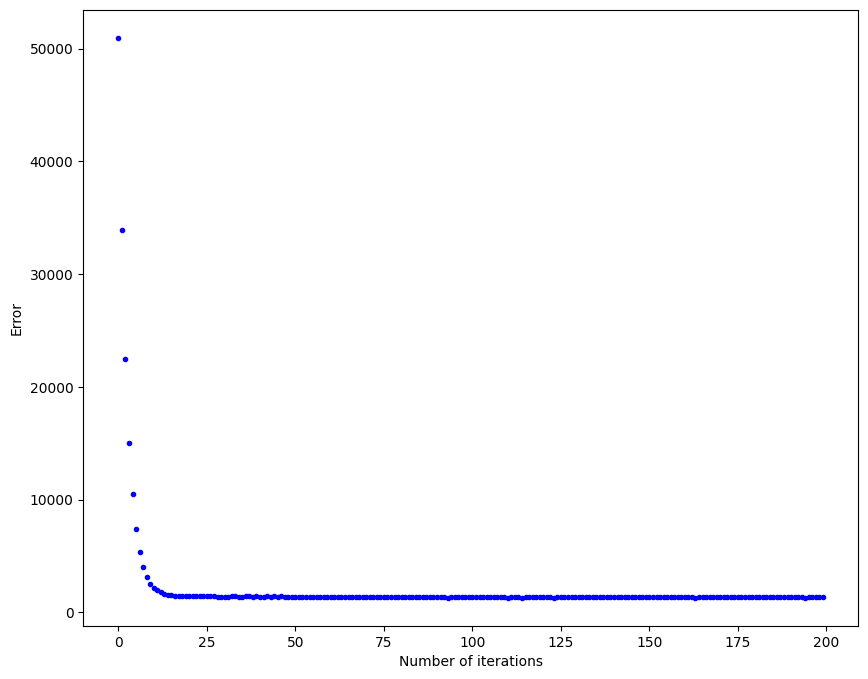

In [191]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred_1 = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history_1, 'b.')

2.Test all the three out on real datasets(using iris dataset)

y_pred[0]: 1.000
y_pred[1]: -0.005
Final error: 0.666


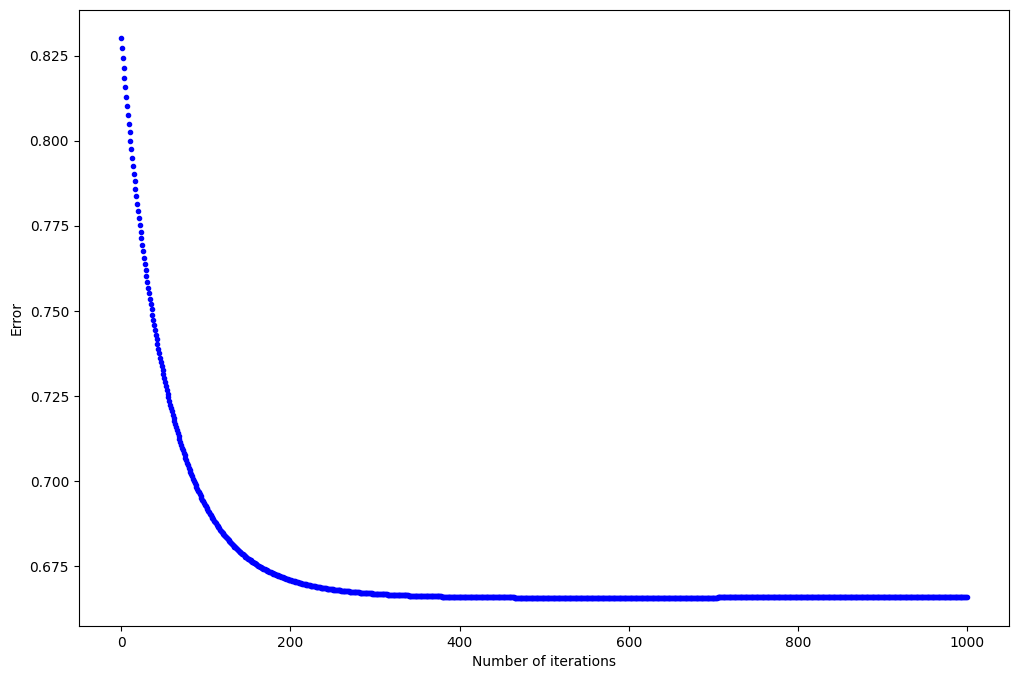

In [192]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Setosa or not

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a column of ones for the bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

def gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 1))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it, 0] = y_pred[0, 0]  # Extract the scalar value
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return cost

lr = 0.01
n_iter = 1000

# Initialize y_pred as a column vector
y_pred = np.zeros((X_train.shape[1], 1))
y_pred, cost_history, y_pred_history = gradient_descent_1(X_train, y_train, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0, 0], y_pred[1, 0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

y_pred[0]: 0.129
y_pred[1]: -0.086
Final error: 104.726


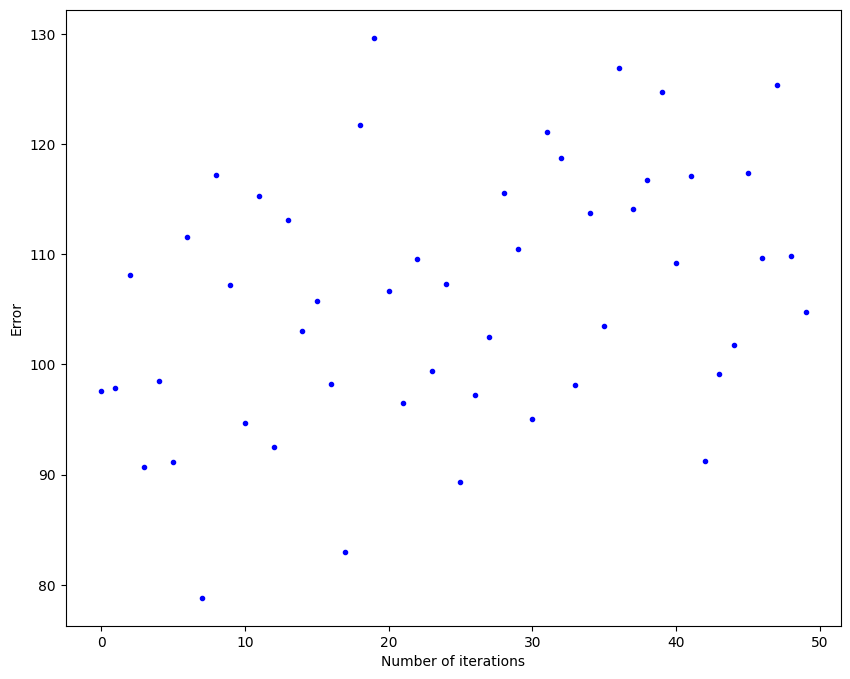

In [193]:
def stocashtic_gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history
lr = 0.01
n_iter = 50
y_pred = np.zeros((X_train.shape[1], 1))
y_pred, cost_history = stocashtic_gradient_descent_1(X_train, y_train, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Final y_pred:
 [[ 0.16576207]
 [ 0.16576207]
 [ 0.00086191]
 [-0.00278109]
 [-0.00900573]]
Final cost_history:
 [3.29961422 2.95138871 3.02926169 3.12562875 2.89001284 2.76446488
 2.7639385  3.50105965 3.00032806 3.24833994 3.12626963 3.13233156
 3.14720183 3.1392743  3.14033032 2.8937623  3.01318384 2.88362307
 3.00644129 3.00737791 3.00760299 3.01108158 3.12903529 3.00852509
 2.88217568 3.01074109 3.13559138 3.01725293 2.51474661 3.11930182
 2.87677534 2.77392528 3.01309496 3.13336349 3.1323609  3.01160421
 2.7586434  2.87722153 2.76482757 3.13326148 3.14476895 3.14001776
 3.01572355 3.01414893 2.88775393 3.25478614 3.13174217 3.00487697
 3.25165007 3.25574012 3.00607281 3.12594137 3.12626509 3.00198227
 2.87872136 2.75180008 3.13205197 3.13158026 3.12825845 3.00282074
 3.13376539 3.13156669 3.25600738 2.88727435 3.24812932 2.63855687
 2.86657835 3.00341894 2.87795957 2.76152227 3.26026748 3.01111399
 2.89005214 3.1284426  3.12662967 3.12693926 3.13228486 2.75990546
 2.88151831 3.118

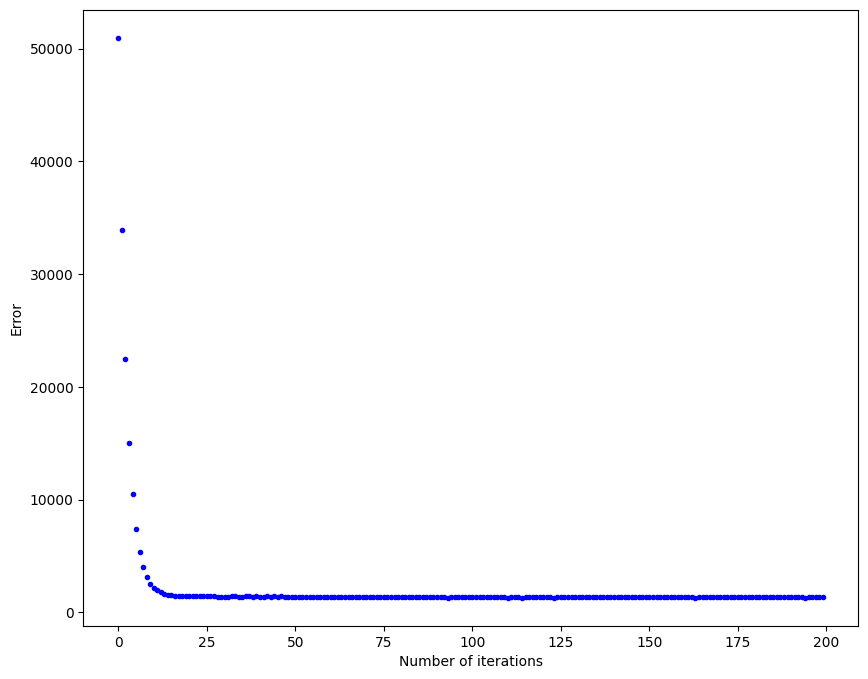

In [194]:
def minibatch_gradient_descent_2(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=36):
    m, n_features = X.shape
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_batch = X[indices]
        y_batch = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_batch[i: i + batch_size, :-1]  # Adjust to (36, 5)
            y_i = y_batch[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]

            # Initialize y_pred_i based on the number of features in X_i
            n_features_i = X_i.shape[1]
            y_pred_i = y_pred[:n_features_i, :]

            # Ensure correct shape for y_pred_i
            y_pred_i = y_pred_i.reshape(-1, 1)

            prediction = np.dot(X_i, y_pred_i)
            error = prediction - y_i
            gradient = X_i.T.dot(error) / m

            # Update y_pred by looping through the features
            for j in range(n_features_i):
                y_pred[j, 0] -= learning_rate * np.sum(gradient[j, :])

            cost += cal_cost(y_pred_i, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history





def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return cost

lr = 0.01
n_iter = 200

# Initialize y_pred with the correct shape
y_pred = np.zeros((X_train.shape[1], 1))
y_pred, cost_history = minibatch_gradient_descent_2(X_train, y_train, y_pred, lr, n_iter)

# Print final y_pred and cost_history for examination
print('Final y_pred:\n', y_pred)
print('Final cost_history:\n', cost_history)

fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history_1, 'b.')


3.Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

y_pred[0]: 1.000
y_pred[1]: -0.000
Final error: 0.667


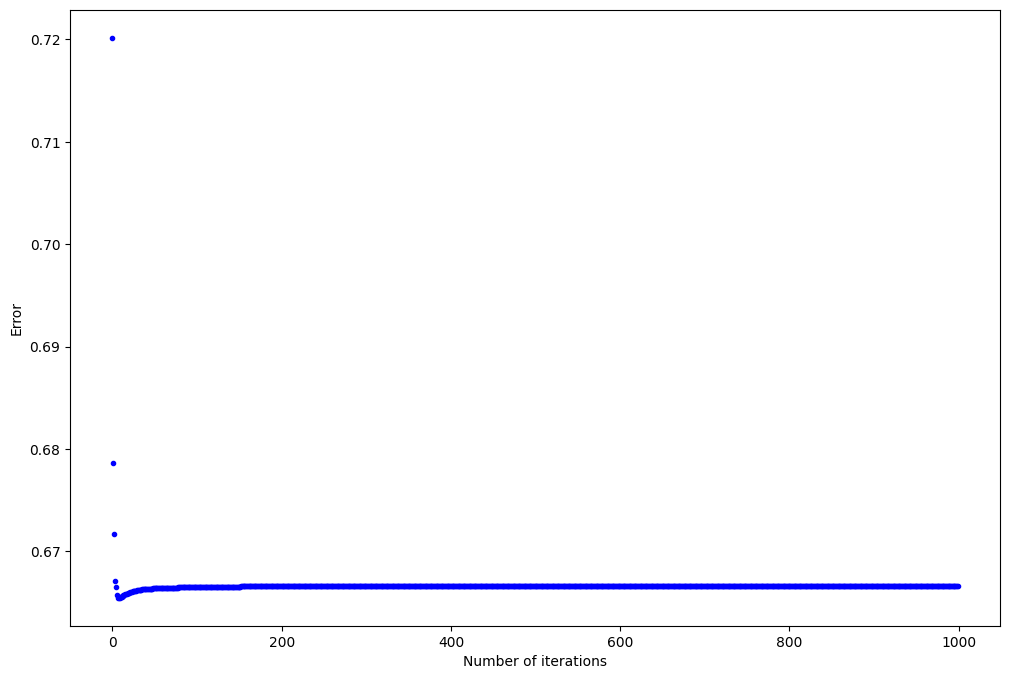

In [195]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Setosa or not

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a column of ones for the bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

def gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 1))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it, 0] = y_pred[0, 0]  # Extract the scalar value
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return cost

lr = 0.5
n_iter = 1000

# Initialize y_pred as a column vector
y_pred = np.zeros((X_train.shape[1], 1))
y_pred, cost_history, y_pred_history = gradient_descent_1(X_train, y_train, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0, 0], y_pred[1, 0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

y_pred[0]: 0.316
y_pred[1]: -0.010
Final error: 98.798


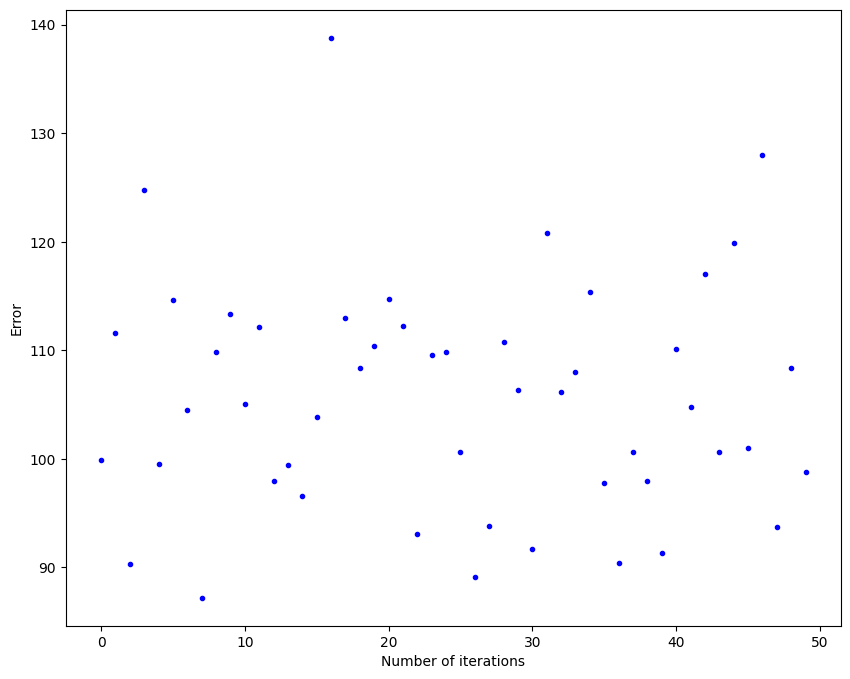

In [196]:
def stocashtic_gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history
lr = 0.5
n_iter = 50
y_pred = np.zeros((X_train.shape[1], 1))
y_pred, cost_history = stocashtic_gradient_descent_1(X_train, y_train, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

<ipython-input-200-8836aefff78a>:44: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))


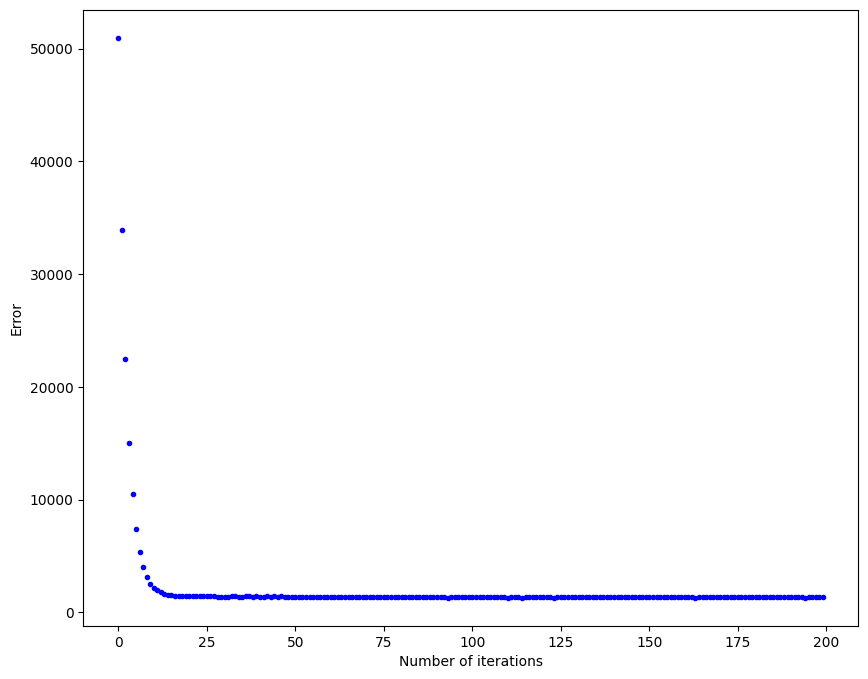

In [200]:
def minibatch_gradient_descent_2(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=36):
    m, n_features = X.shape
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_batch = X[indices]
        y_batch = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_batch[i: i + batch_size, :-1]  # Adjust to (36, 5)
            y_i = y_batch[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]

            # Initialize y_pred_i based on the number of features in X_i
            n_features_i = X_i.shape[1]
            y_pred_i = y_pred[:n_features_i, :]

            # Ensure correct shape for y_pred_i
            y_pred_i = y_pred_i.reshape(-1, 1)

            prediction = np.dot(X_i, y_pred_i)
            error = prediction - y_i
            gradient = X_i.T.dot(error) / m

            # Update y_pred by looping through the features
            for j in range(n_features_i):
                y_pred[j, 0] -= learning_rate * np.sum(gradient[j, :])

            cost += cal_cost(y_pred_i, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history





def cal_cost(y_pred, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
    return cost

lr = 0.5
n_iter = 200

# Initialize y_pred with the correct shape
y_pred = np.zeros((X_train.shape[1], 1))
y_pred, cost_history = minibatch_gradient_descent_2(X_train, y_train, y_pred, lr, n_iter)

# Print final y_pred and cost_history for examination


fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history_1, 'b.')
